In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [ ]:
df = pd.read_csv('heart.csv')
print(" FIRST 5 ROWS.")
print(df.head())
print("\n Informaion of cloumns:")
df.info()
print("\n   Missing value for coloumns:")
print(df.isnull().sum())


 FIRST 5 ROWS.
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  

 Informaion of cloumns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4

In [ ]:

column_explanation = {
    'age': 'Age (years)',
    'sex': 'Gender (Male=1 / Female=0)',
    'cp': 'Chest Pain Type (0-3)',
    'trestbps': 'Resting Blood Pressure (mmHg)',
    'chol': 'Cholesterol Level (mg/dl)',
    'fbs': 'Fasting Blood Sugar >120 mg/dl (1=Yes, 0=No)',
    'restecg': 'Resting ECG Result (0-2)',
    'thalach': 'Maximum Heart Rate Achieved',
    'exang': 'Exercise-induced Chest Pain (1=Yes, 0=No)',
    'oldpeak': 'ST Depression Induced by Exercise Relative to Rest',
    'slope': 'Slope of the Peak Exercise ST Segment (0-2)',
    'ca': 'Number of Major Vessels Colored by Fluoroscopy (0-3)',
    'thal': 'Thalassemia Type (3=Normal, 6=Fixed Defect, 7=Reversible Defect)',
    'target': 'Heart Disease Presence (1=Disease, 0=No Disease)'
}




In [ ]:
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPain',
    'trestbps': 'RestBP',
    'chol': 'Chol',
    'fbs': 'FastingBS',
    'restecg': 'RestECG',
    'thalach': 'MaxHR',
    'exang': 'ExAng',
    'oldpeak': 'STDep',
    'slope': 'STSlope',
    'ca': 'CA',
    'thal': 'Thal',
    'target': 'HeartDisease'
}, inplace=True)

print(df.head())


   Age  Sex  ChestPain  RestBP  Chol  FastingBS  RestECG  MaxHR  ExAng  STDep  \
0   63    1          0     145   233          1        2    150      0    2.3   
1   67    1          3     160   286          0        2    108      1    1.5   
2   67    1          3     120   229          0        2    129      1    2.6   
3   37    1          2     130   250          0        0    187      0    3.5   
4   41    0          1     130   204          0        2    172      0    1.4   

   STSlope  CA  Thal  HeartDisease  
0        2   0     2             0  
1        1   3     1             1  
2        1   2     3             1  
3        2   0     1             0  
4        0   0     1             0  


In [ ]:
print("\nDescriptive statistics of the data:")
print(df[['Age','RestBP','Chol','MaxHR','STDep']].describe())



Descriptive statistics of the data:
              Age      RestBP        Chol       MaxHR       STDep
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.438944  131.689769  246.693069  149.607261    1.039604
std      9.038662   17.599748   51.776918   22.875003    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     48.000000  120.000000  211.000000  133.500000    0.000000
50%     56.000000  130.000000  241.000000  153.000000    0.800000
75%     61.000000  140.000000  275.000000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000


In [ ]:

df['Age'] = df['Age'].astype(int)
df['STDep'] = df['STDep'].astype(float)
df['Sex'] = df['Sex'].astype('category')
df['HeartDisease'] = df['HeartDisease'].astype('category')



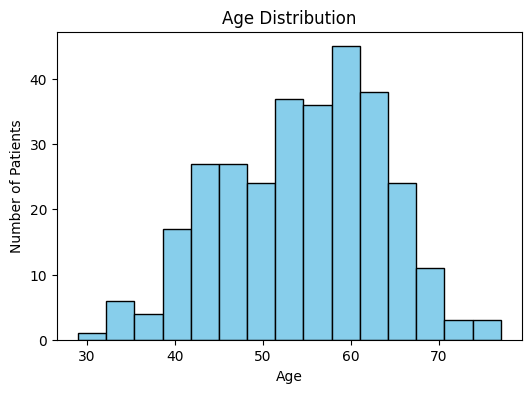

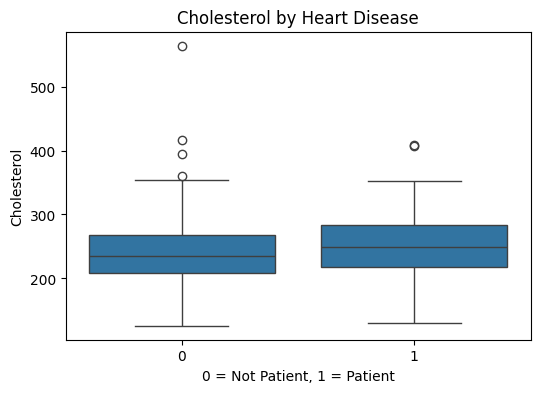

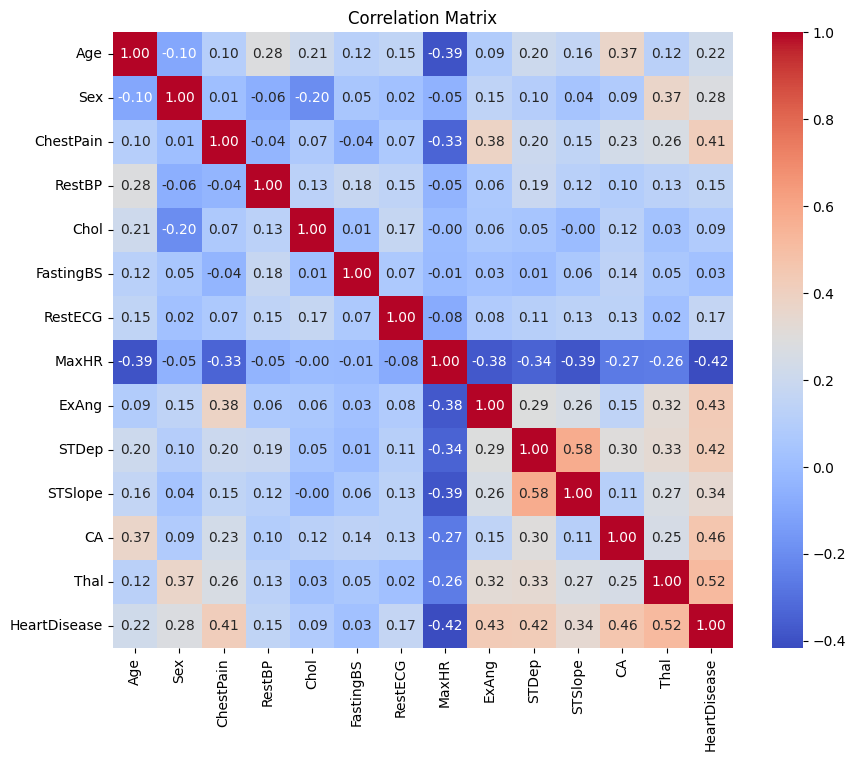

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

#  Histogram
# Age Distribution
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

#  Boxplot
# Cholesterol by Heart Disease
plt.figure(figsize=(6,4))
sns.boxplot(x='HeartDisease', y='Chol', data=df)
plt.title('Cholesterol by Heart Disease')
plt.xlabel('0 = Not Patient, 1 = Patient')
plt.ylabel('Cholesterol')
plt.show()

#  Heatmap
# Correlation between Variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
def simple_risk(age, chol, maxhr):
    score = 0

    if age > 55:
        score += 1
    elif age > 45:
        score += 0.5

    if chol > 240:
        score += 1
    elif chol > 200:
        score += 0.5

    if maxhr < 120:
        score += 1
    elif maxhr < 140:
        score += 0.5

    if score >= 2:
        return "High Risk"
    elif score >= 1:
        return "Medium Risk"
    else:
        return "Low Risk"

df['Risk_Level'] = df.apply(lambda row: simple_risk(row['Age'], row['Chol'], row['MaxHR']), axis=1)

print(df[['Age','Chol','MaxHR','Risk_Level']].head(10))



   Age  Chol  MaxHR   Risk_Level
0   63   233    150  Medium Risk
1   67   286    108    High Risk
2   67   229    129    High Risk
3   37   250    187  Medium Risk
4   41   204    172     Low Risk
5   56   236    178  Medium Risk
6   62   268    160    High Risk
7   57   354    163    High Risk
8   63   254    147    High Risk
9   53   203    155  Medium Risk


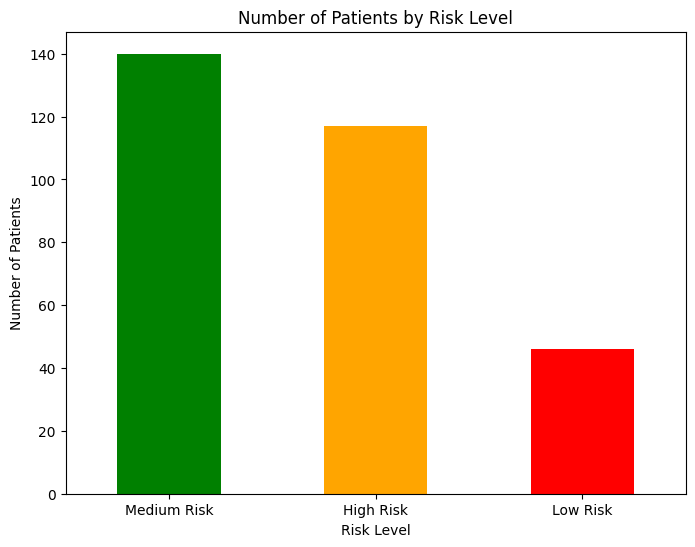

In [ ]:
import matplotlib.pyplot as plt

# Count number of patients by Risk Level
risk_counts = df['Risk_Level'].value_counts()

# Bar chart
plt.figure(figsize=(8,6))
risk_counts.plot(kind='bar', color=['green','orange','red'])
plt.title('Number of Patients by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()



Risk_Level  High Risk  Low Risk  Medium Risk
Sex                                         
0                  44        15           38
1                  73        31          102


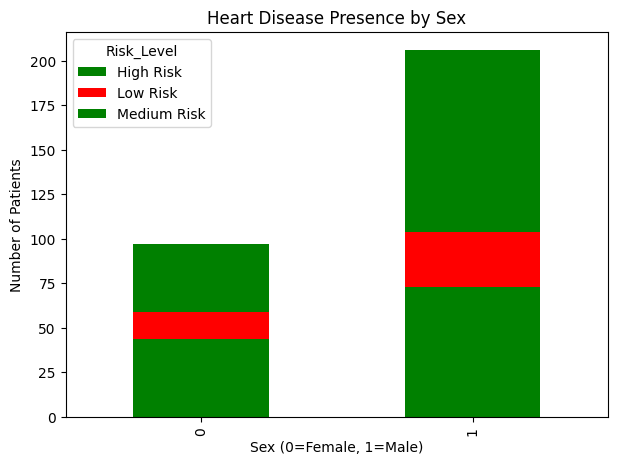

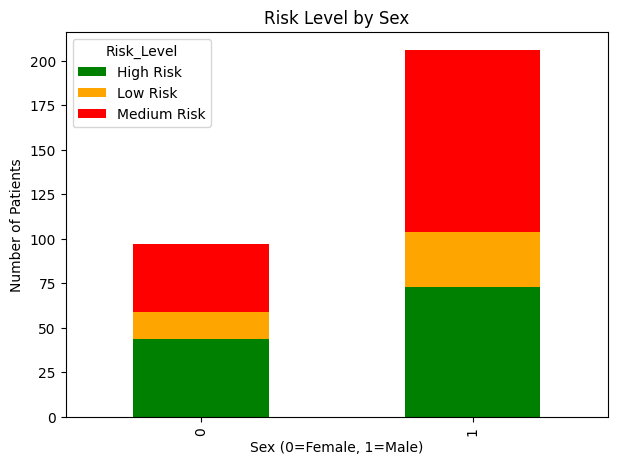

In [ ]:
import matplotlib.pyplot as plt

# Number of Disease vs Sex
#sex_target = df.groupby('Sex')['HeartDisease'].value_counts().unstack().fillna(0)
sex_target = df.groupby('Sex', observed=True)['Risk_Level'].value_counts().unstack().fillna(0)
# This function was assisted by ChatGPT to optimize performance


sex_target.rename(columns={0:'No Disease', 1:'Disease'}, inplace=True)
print(sex_target)

# Bar chart
sex_target.plot(kind='bar', stacked=True, color=['green','red'], figsize=(7,5))
plt.title('Heart Disease Presence by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Number of Patients')
plt.show()

# Risk_Level vs Sex

#sex_risk = df.groupby('Sex')['Risk_Level'].value_counts().unstack().fillna(0)
sex_risk = df.groupby('Sex', observed=True)['Risk_Level'].value_counts().unstack().fillna(0)
# This function was assisted by ChatGPT to optimize performance


sex_risk.plot(kind='bar', stacked=True, color=['green','orange','red'], figsize=(7,5))
plt.title('Risk Level by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Number of Patients')
plt.show()


In [ ]:
df.to_csv('heart_disease_final.csv', index=False)


In [ ]:
import pandas as pd

df = pd.read_csv("heart_disease_final.csv")

numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

corr_long = corr.reset_index().melt(id_vars='index')
corr_long.columns = ['Feature1', 'Feature2', 'Correlation']

corr_long['Correlation'] = corr_long['Correlation'].round(2)

corr_long.to_csv("correlation_matrix_long.csv", index=False)




In [ ]:
df.head()

Feature1 Feature2 Correlation
0       age      age        1.00
1       sex      age       -0.10
2        cp      age        0.10
3  trestbps      age        0.28
4      chol      age        0.21